# Seccion 1: Preprocesamiento de los Datos - Pipeline

A continuación se crea un pipeline que tiene como propósito ser utilizado para limpiar los datos de forma general antes de pasarlos a cualquier limpieza necesaria para cualquier algoritmo en particular. Se realizan, entre otros, ejercicios de one-hot encoding, imputación y normalizaión. Todo esto se consolida en un Pipeline para su reutilización.


## 0. Instalar dependencias


In [1431]:
%%sh
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


## 1. Carga y exploración de los datos


In [1330]:
import pandas as pd
import numpy as np

In [1331]:
# Cargar el archivo csv a un DataFrame
# Note que aqui se usa un path relativo a la raiz del repositorio de Github
df = pd.read_csv('./data/Datos_BiciAlpes.csv',
                 delimiter=";", encoding='ISO-8859-1')


In [1332]:
# Observar primeros 20 resultados
df.head(20)


,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,NaN
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,NaN
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN
5,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
6,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,0,1,2,NaN
7,Tarde,1,Día laboral,3,30.0,4,1,1,1,bike,1,0,1,3,NaN
8,Noche,1,Día laboral,3,30.0,4,1,2,1,bike,1,3,1,3,NaN
9,Tarde,1,Fin de semana,3,30.0,1,1,1,1,bike,1,6,1,3,NaN


- Miremos el tipo de variables


In [1333]:
# Parece que hay que cambiar algunas de tipo object a str.
df.dtypes


Time                                            object
Number_of_Casualties                             int64
Day_of_Week                                     object
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    object
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

In [1334]:
# Pasar las de objeto a str
df['Time'] = df['Time'].astype('string')
df['Day_of_Week'] = df['Day_of_Week'].astype('string')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('string')


In [1335]:
# Verificar
df.dtypes


Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Vehicle_Type                                    string
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

- Ahora vamos a observar las distribuciones de las variables generando diagramas de barras. Esto nos va a servir más adelante para ver si hay outliers y tratar de aplicar transformaciones para corregir esto.


<Axes: >

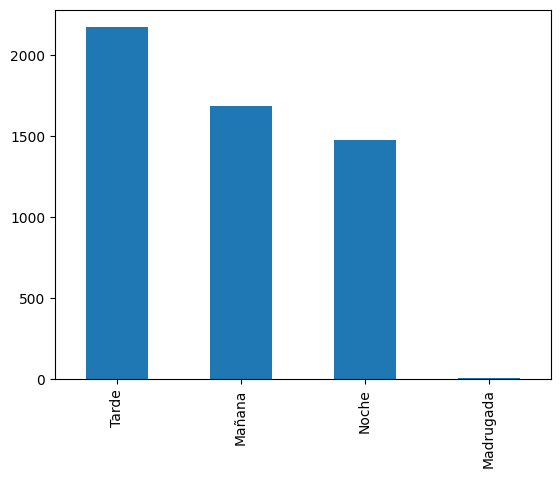

In [1336]:
df['Time'].value_counts().plot(kind='bar')


- Nota: Vemos que hay una **representacion baja de valores de madrugada**.


<Axes: >

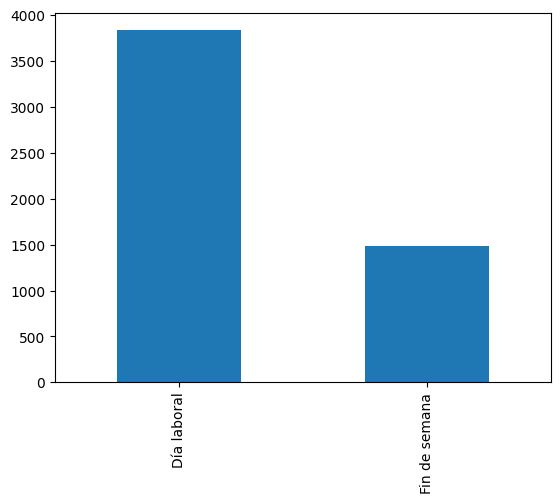

In [1337]:
df['Day_of_Week'].value_counts().plot(kind='bar')


<Axes: >

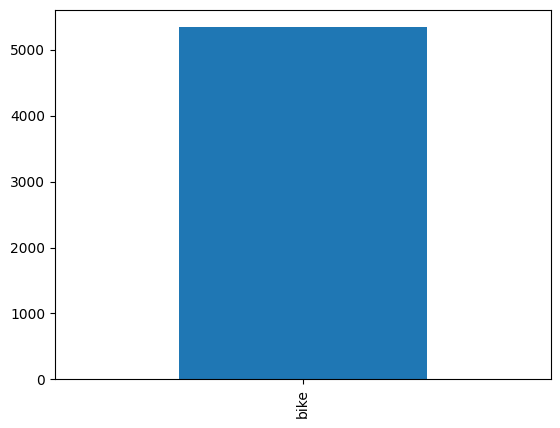

In [1338]:
df['Vehicle_Type'].value_counts().plot(kind='bar')


**Esto es problematico, vemos que en la base de datos solo hay ejemplos para muertes de bicicletas**. Por tanto esta variable es irrelevante. **Vamos a dropearla de una vez de la base de datos**


In [1339]:
df = df.drop('Vehicle_Type', axis=1)


In [1340]:
df.dtypes


Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                        int64
Speed_limit                                    float64
Light_Conditions                                 int64
Weather_Conditions                               int64
Road_Surface_Conditions                          int64
Urban_or_Rural_Area                              int64
Did_Police_Officer_Attend_Scene_of_Accident      int64
Junction_Detail                                  int64
Number_of_Vehicles                               int64
Accident_Severity                                int64
Unnamed: 14                                    float64
dtype: object

- Ahora bien, ya que terminamos el analisis de las variables string continuaremos con las que son categoricas segun la base de datos. Sin embargo antes analizaremos una la columna Unnamed. **Llama la atención que hay un alto porcentaje de valores nulos**


In [1341]:
print('Hay ' + str(len(df['Unnamed: 14'].isna())) +
      ' valores nulos en esta columna de ' + str(df.shape[0]))


Hay 5338 valores nulos en esta columna de 5338


In [1342]:
# Vamos a dropearla
df = df.drop('Unnamed: 14', axis=1)


### 1.1 Análisis Variables categoricas


- Segun el diccionario de la base de datos las siguientes variables son categoricas

  - Accident_severity
  - Day_of_Week
  - Time
  - Road type
  - Junction_detail
  - Light_conditions
  - Weather_Conditions
  - Road_surface_conditions
  - Urban_or_Rural_Area
  - Vehicle_Type
  - Did_Police_Officer_Attend_Scene_of_Accident

- Vamos a convertir estas a str y ver sus distribuciones entre las categoriasy analizar los resultados.


#### 1.1.1 Convertir a string


In [1343]:
cat_vars = ['Accident_Severity',
            'Day_of_Week',
            'Time', 'Road_Type',
            'Junction_Detail',
            'Light_Conditions',
            'Weather_Conditions',
            'Road_Surface_Conditions',
            'Urban_or_Rural_Area',
            # 'Vehicle_type', // Esta la dropeamos
            'Did_Police_Officer_Attend_Scene_of_Accident']

for var in cat_vars:
    df[var] = df[var].astype('string')


In [1344]:
df.dtypes


Time                                            string
Number_of_Casualties                             int64
Day_of_Week                                     string
Road_Type                                       string
Speed_limit                                    float64
Light_Conditions                                string
Weather_Conditions                              string
Road_Surface_Conditions                         string
Urban_or_Rural_Area                             string
Did_Police_Officer_Attend_Scene_of_Accident     string
Junction_Detail                                 string
Number_of_Vehicles                               int64
Accident_Severity                               string
dtype: object

#### 1.1.2 Reemplazar por labels del diccionario para las que faltan y ver su distribucion


In [1345]:
# Bien, ahora miremos las distribuciones
def plot_distribution(df: pd.DataFrame, col: str, dropna=True):
    df[col].value_counts(dropna=dropna).plot(kind='bar')


In [1346]:
df['Accident_Severity'] = df['Accident_Severity'].replace(
    {'1': 'Fatal', '2': 'Serio', '3': 'Leve'})


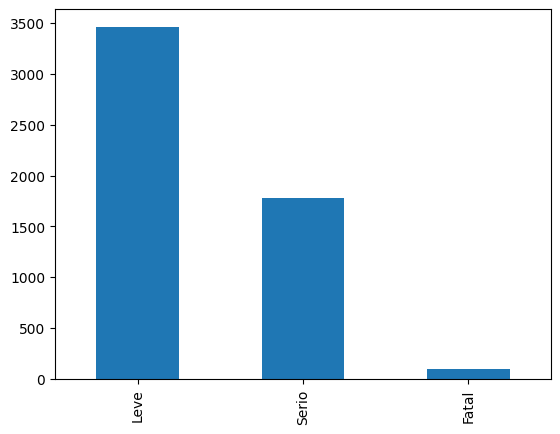

In [1347]:
plot_distribution(df, 'Accident_Severity')


In [1348]:
labels = ['Rotonda', '1SoloSentido', 'Autovia',
          'Calzada', 'Circunvalacion', 'Desconocida']
numbers = list(map(str, [1, 2, 3, 6, 7, 9]))
df['Road_Type'] = df['Road_Type'].replace(dict(zip(numbers, labels)))


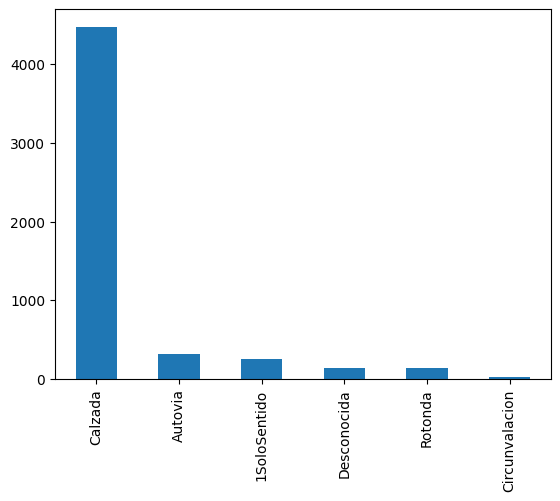

In [1349]:
plot_distribution(df, 'Road_Type')


In [1350]:
df['Junction_Detail'] = df['Junction_Detail'].astype('string')


In [1351]:
df['Junction_Detail'].value_counts(dropna=False)


0     2763
3     1555
6      468
1      199
9      171
7       68
8       43
2       34
-1      25
5       12
Name: Junction_Detail, dtype: Int64

In [1352]:
labels = {'0': 'No_hay_cruce', '1': 'Rotonda', '2': 'Minirotonda', '3': 'T', '5': 'Carretera_Acceso',
          '6': 'Encrucijada', '7': '+4salidas', '8': 'Entrada_Privada', '9': 'Otros', '-1': np.NAN}


In [1353]:
df['Junction_Detail'] = df['Junction_Detail'].replace(labels)


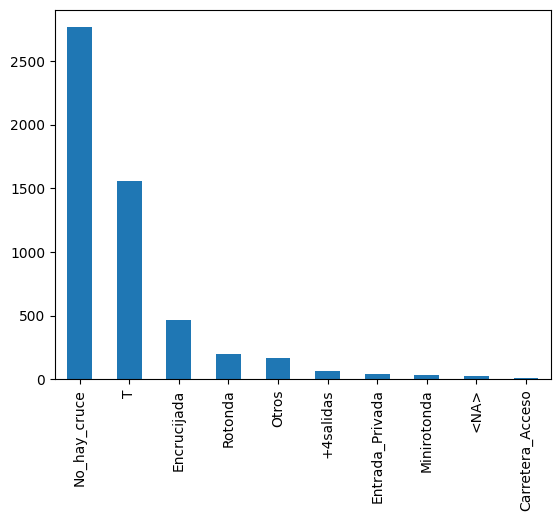

In [1354]:
plot_distribution(df, 'Junction_Detail', False)


**Vemos que hay nans en esta característica**. Son pocos entonces más adelante lso imputaremos con la moda (No_hay_cruce).


In [1355]:
labels_light_conditions = {'1': 'Diurna', '4': 'Oscuridad_Luces_Encendidas',
                           '6': 'Oscuridad_Sin_Iluminacion', '7': 'Oscuridad_Iluminacion_Desconocida', '5': 'Oscuridad_Luces_Apagadas'}


In [1356]:
df['Light_Conditions'] = df['Light_Conditions'].replace(
    labels_light_conditions)


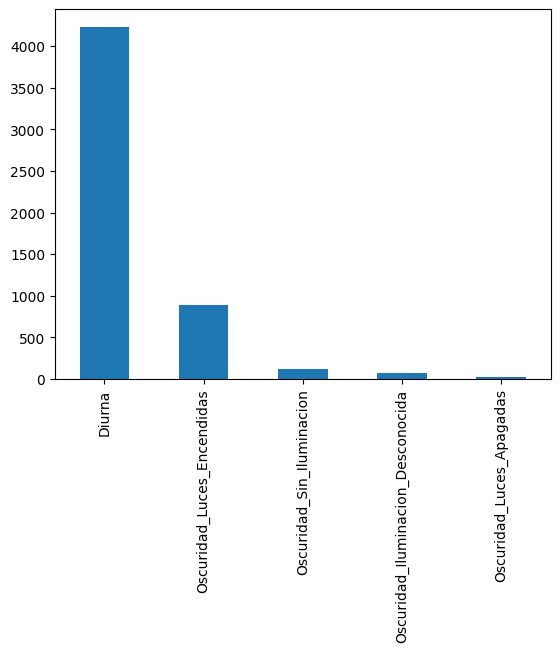

In [1357]:
plot_distribution(df, 'Light_Conditions')


In [1358]:
df['Weather_Conditions'].value_counts()


1    4621
2     321
9     191
8      80
4      59
5      46
3      12
7       7
6       1
Name: Weather_Conditions, dtype: Int64

In [1359]:
labels = ['Bien, con vientos suaves', 'Lluvioso', 'Nevando', 'Bien, con vientos fuertes',
          'Lluvioso, con vientos fuertes', 'Nevando, con vientos fuertes', 'Niebla', 'Otro', 'Desconocido']
replace_weather_conditions = dict(
    map(lambda x: (str(x[0] + 1), x[1]), enumerate(labels)))


In [1360]:
replace_weather_conditions


{'1': 'Bien, con vientos suaves',
 '2': 'Lluvioso',
 '3': 'Nevando',
 '4': 'Bien, con vientos fuertes',
 '5': 'Lluvioso, con vientos fuertes',
 '6': 'Nevando, con vientos fuertes',
 '7': 'Niebla',
 '8': 'Otro',
 '9': 'Desconocido'}

In [1361]:
df['Weather_Conditions'] = df['Weather_Conditions'].replace(
    replace_weather_conditions)


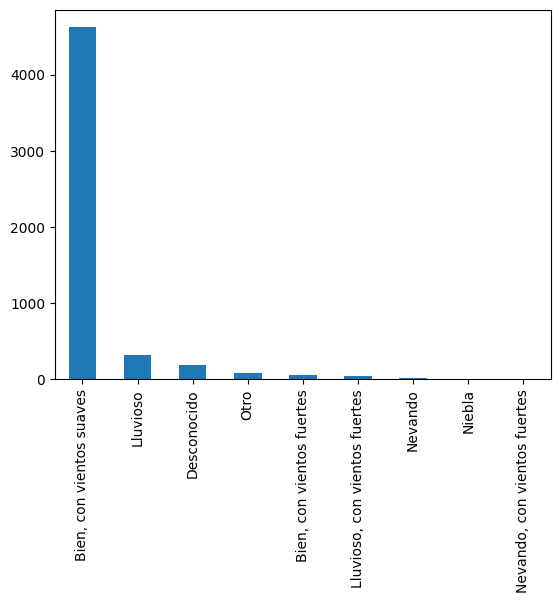

In [1362]:
plot_distribution(df, 'Weather_Conditions')


In [1363]:
df['Road_Surface_Conditions'].value_counts()


1     4260
2      901
4       87
-1      81
3        8
5        1
Name: Road_Surface_Conditions, dtype: Int64

In [1364]:
labels = ['Seca', 'Húmeda', 'Nieve', 'Hielo', 'Inundadas', 'Aceite', 'Fango']
replace_road_surface_conditions = dict(
    map(lambda x: (str(x[0] + 1), x[1]), enumerate(labels))) | {'-1': np.NAN}
replace_road_surface_conditions


{'1': 'Seca',
 '2': 'Húmeda',
 '3': 'Nieve',
 '4': 'Hielo',
 '5': 'Inundadas',
 '6': 'Aceite',
 '7': 'Fango',
 '-1': nan}

In [1365]:
df['Road_Surface_Condition'] = df['Road_Surface_Conditions'].replace(
    replace_road_surface_conditions)


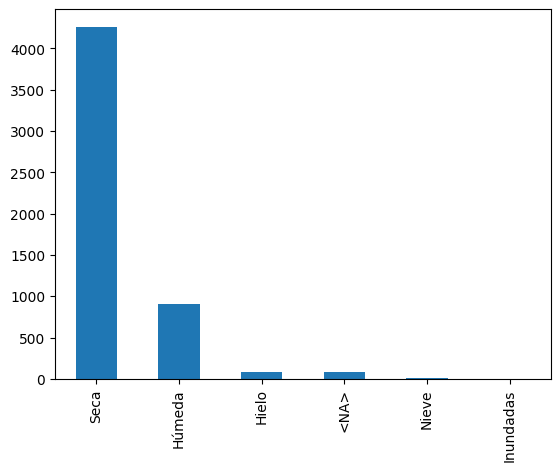

In [1366]:
plot_distribution(df, 'Road_Surface_Condition', False)


In [1367]:
df['Urban_or_Rural_Area'].value_counts()


1    4040
2    1298
Name: Urban_or_Rural_Area, dtype: Int64

In [1368]:
labels = ['Urbano', 'Rural', 'No especificado']
replace_urban_rural = dict(
    map(lambda x: (str(x[0] + 1), x[1]), enumerate(labels)))
replace_urban_rural


{'1': 'Urbano', '2': 'Rural', '3': 'No especificado'}

In [1369]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].replace(
    replace_urban_rural)


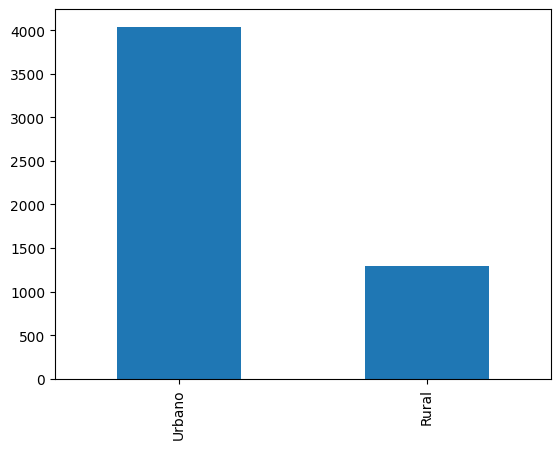

In [1370]:
plot_distribution(df, 'Urban_or_Rural_Area')


In [1371]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()


1     4059
2     1231
3       46
-1       2
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: Int64

In [1372]:
replace_police = {'1': 'Si', '2': 'No', '3': 'No se reporto', '-1': np.NAN}


In [1373]:
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].replace(
    replace_police)


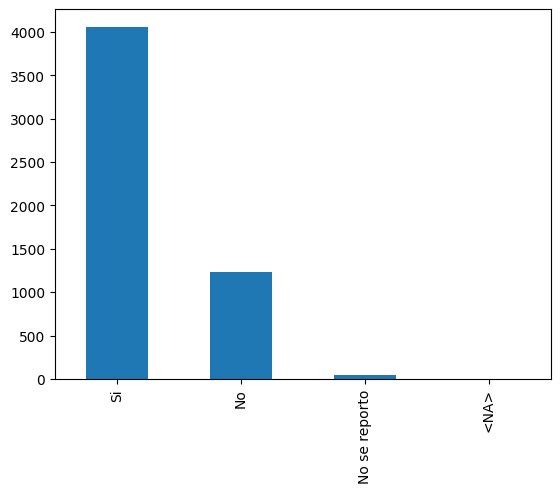

In [1374]:
plot_distribution(df, 'Did_Police_Officer_Attend_Scene_of_Accident', False)


### 1.2 Analisis Variables Continuas


#### 1.2.1 Recuperar variables continuas


- Vamos a analizar el, número de missing values y distribución de cada una de estas variables


In [1375]:
def is_str(x): return type(df[x].dtype) is pd.core.arrays.string_.StringDtype


In [1376]:
list(df.columns)


['Time',
 'Number_of_Casualties',
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Detail',
 'Number_of_Vehicles',
 'Accident_Severity',
 'Road_Surface_Condition']

In [1377]:
cont_cols = list(filter(lambda x: not is_str(x), list(df.columns)))


In [1378]:
cont_cols


['Number_of_Casualties', 'Speed_limit', 'Number_of_Vehicles']

#### 1.2.2 Explorar distribuciones


- Miremos la densidad del numero de muertes


<Axes: ylabel='Density'>

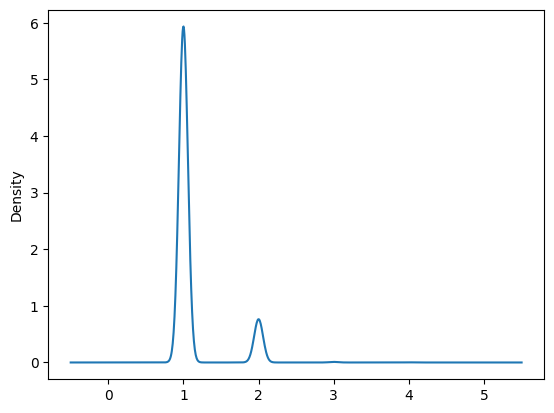

In [1379]:
df[cont_cols[0]].plot(kind='kde', ylabel='Density Number of Casualties')


- Vemos que para esta variable la mayoria estan concentradas en 1 y el resto en 2, 3 o 4. Vamos a convertir esta variable en una variable categorica


In [1380]:
df[cont_cols[0]] = df[cont_cols[0]].astype('string')


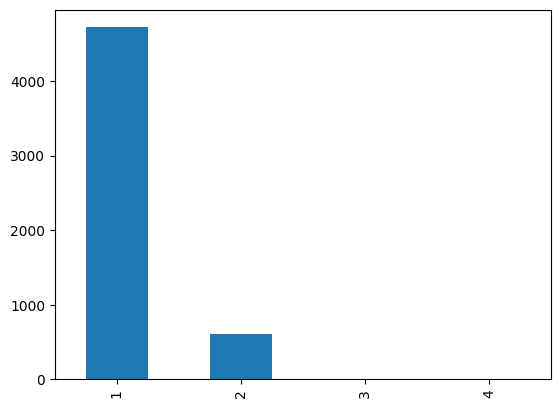

In [1381]:
plot_distribution(df, cont_cols[0])


In [1382]:
# Actualizemos las variables continuas ya que removimos una
cont_cols = cont_cols[1:]


In [1383]:
# Sigamos explorando ahora esta variable
cont_cols[0]


'Speed_limit'

<Axes: ylabel='Density'>

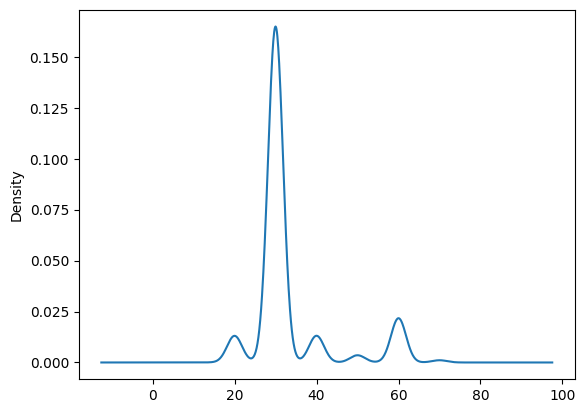

In [1384]:
df[cont_cols[0]].plot(kind='kde')


In [1385]:
# Veamos ahora los value counts
df[cont_cols[0]].value_counts()


30.0    4047
60.0     533
40.0     322
20.0     321
50.0      87
70.0      27
15.0       1
Name: Speed_limit, dtype: int64

In [1386]:
# Tampoco tiene mucha variabilidad, vamos a pasarla a discreta.


In [1387]:
df[cont_cols[0]] = df[cont_cols[0]].astype('string')


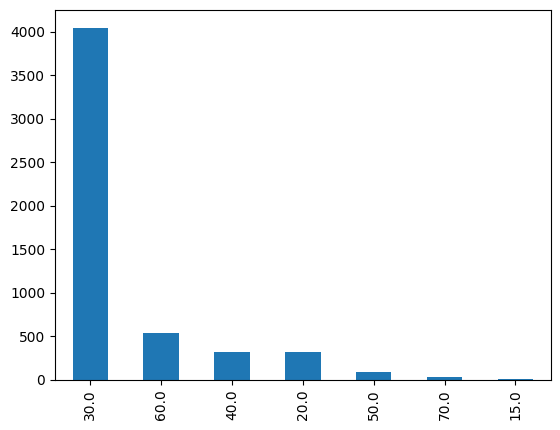

In [1388]:
plot_distribution(df, cont_cols[0])


In [1389]:
# Actualizemos ya que volvimos a reducir este conjunto de variables continuas
cont_cols = cont_cols[1:]
cont_cols


['Number_of_Vehicles']

<Axes: ylabel='Density'>

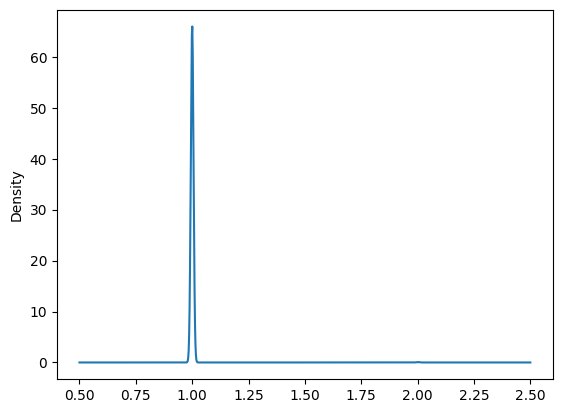

In [1390]:
# Exploremos la distribución de número de vehiculos
df[cont_cols[0]].plot(kind='kde')


In [1391]:
# Miremos los value counts
df[cont_cols[0]].value_counts()


1    5332
2       6
Name: Number_of_Vehicles, dtype: int64

In [1392]:
# No hay variabilidad, vale más la pena estudiarla como variable categorica


In [1393]:
df[cont_cols[0]] = df[cont_cols[0]].astype('string')


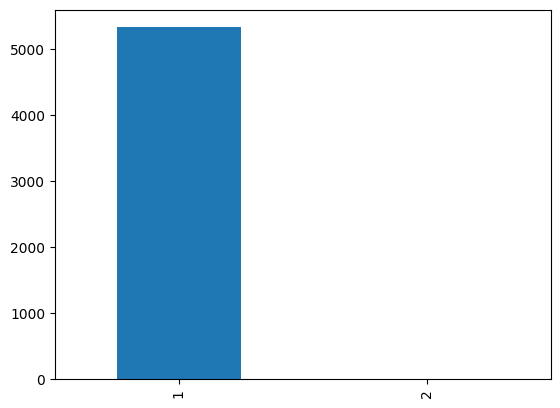

In [1394]:
plot_distribution(df, cont_cols[0])


### 1.3 Resumen resultado exploración


- Tenemos entonces las siguientes variables


In [1395]:
df.dtypes


Time                                           string
Number_of_Casualties                           string
Day_of_Week                                    string
Road_Type                                      string
Speed_limit                                    string
Light_Conditions                               string
Weather_Conditions                             string
Road_Surface_Conditions                        string
Urban_or_Rural_Area                            string
Did_Police_Officer_Attend_Scene_of_Accident    string
Junction_Detail                                string
Number_of_Vehicles                             string
Accident_Severity                              string
Road_Surface_Condition                         string
dtype: object

- Como vemos, debido a la baja variabilidad de las que representaban valores númericos originalmente, optamos por tratarlas como categoricas.
- Miremos el número de valores faltantes por columna


In [1396]:
df.isna().sum()


Time                                            0
Number_of_Casualties                            0
Day_of_Week                                    19
Road_Type                                       0
Speed_limit                                     0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Urban_or_Rural_Area                             0
Did_Police_Officer_Attend_Scene_of_Accident     2
Junction_Detail                                25
Number_of_Vehicles                              0
Accident_Severity                               0
Road_Surface_Condition                         81
dtype: int64

- Vemos que, relativo al total de observaciones el número de valores faltantes es bajo y por tanto procederemos a hacer una imputación con la moda para las variables categoricas (todas). En la siguiente seccion realizaremos esto y posteriormente un OneHotEncoding.


## 2. Construcción del Pipeline


In [1397]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


In [1398]:
df[:] = df[:].astype('category')


/var/folders/x7/86msfzy10gn62hrc2kbqnsyw0000gq/T/ipykernel_43994/1477656044.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [1399]:
# Transformación necesaria para que identifique
df[:] = df[:].replace({np.NAN: None})
df.isna().sum()


/var/folders/x7/86msfzy10gn62hrc2kbqnsyw0000gq/T/ipykernel_43994/1578082431.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


Time                                            0
Number_of_Casualties                            0
Day_of_Week                                    19
Road_Type                                       0
Speed_limit                                     0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Urban_or_Rural_Area                             0
Did_Police_Officer_Attend_Scene_of_Accident     2
Junction_Detail                                25
Number_of_Vehicles                              0
Accident_Severity                               0
Road_Surface_Condition                         81
dtype: int64

In [1400]:
cols


['Road_Type',
 'Light_Conditions',
 'Weather_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Detail',
 'Accident_Severity',
 'Road_Surface_Condition',
 'Cluster Labels',
 'Segment']

In [1401]:
cols = list(df.columns)
imputer = SimpleImputer(strategy='most_frequent', missing_values=None)
imputed = pd.DataFrame(imputer.fit_transform(df), columns=cols)
imputed.isna().sum()


Time                                           0
Number_of_Casualties                           0
Day_of_Week                                    0
Road_Type                                      0
Speed_limit                                    0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Detail                                0
Number_of_Vehicles                             0
Accident_Severity                              0
Road_Surface_Condition                         0
dtype: int64

In [1402]:
imputed.head()


,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Road_Surface_Condition
0,Mañana,1,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,T,1,Leve,Seca
1,Mañana,1,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,No_hay_cruce,1,Leve,Seca
2,Tarde,1,Fin de semana,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,T,1,Leve,Seca
3,Tarde,2,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,Encrucijada,1,Serio,Seca
4,Mañana,2,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,Encrucijada,1,Leve,Seca


In [1403]:
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded = one_hot.fit_transform(imputed)
encoded


/opt/homebrew/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

- Si bien esta base de datos ya está lista para ser procesada haremos un paso extra para recuperar los labels


In [1404]:
one_hot.get_feature_names_out()


array(['Time_Madrugada', 'Time_Mañana', 'Time_Noche', 'Time_Tarde',
       'Number_of_Casualties_1', 'Number_of_Casualties_2',
       'Number_of_Casualties_3', 'Number_of_Casualties_4',
       'Day_of_Week_Día laboral', 'Day_of_Week_Fin de semana',
       'Road_Type_1SoloSentido', 'Road_Type_Autovia', 'Road_Type_Calzada',
       'Road_Type_Circunvalacion', 'Road_Type_Desconocida',
       'Road_Type_Rotonda', 'Speed_limit_15.0', 'Speed_limit_20.0',
       'Speed_limit_30.0', 'Speed_limit_40.0', 'Speed_limit_50.0',
       'Speed_limit_60.0', 'Speed_limit_70.0', 'Light_Conditions_Diurna',
       'Light_Conditions_Oscuridad_Iluminacion_Desconocida',
       'Light_Conditions_Oscuridad_Luces_Apagadas',
       'Light_Conditions_Oscuridad_Luces_Encendidas',
       'Light_Conditions_Oscuridad_Sin_Iluminacion',
       'Weather_Conditions_Bien, con vientos fuertes',
       'Weather_Conditions_Bien, con vientos suaves',
       'Weather_Conditions_Desconocido', 'Weather_Conditions_Lluvioso',
      

In [1405]:
cols = one_hot.get_feature_names_out()


In [1406]:
final_df = pd.DataFrame(encoded, columns=cols)


In [1407]:
final_df.head()


,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,...,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


- Como vemos, vamos a realizar el clustering en un espacio de 67 dimensiones.


## 3. Guardar Base de Datos con Preprocesamiento General


In [1408]:
final_df.to_csv('./data/final_preprocessed.csv')


In [1409]:
# Para cargar simplemente hacemos
clean_df = pd.read_csv('./data/final_preprocessed.csv')
# Dropeamos el indice
clean_df = clean_df.drop('Unnamed: 0', axis=1)


In [1410]:
clean_df.head()


,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,...,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4. Guardar Base Datos Preprocesada para K-Mmodes


In [1411]:
imputed.to_csv('./data/kmodes_preprocessed.csv')


In [1412]:
imputed_from_csv = pd.read_csv('./data/kmodes_preprocessed.csv')


In [1413]:
imputed_from_csv.drop('Unnamed: 0', axis=1, inplace=True)


# Sección 2: Algoritmos


## 1. Gaussian Mixture


- Implementado por: Daniel Reales


- Vamos a utilizar el algoritmo de Gaussian Mixture para realizar el primer procesamiento de clustering. El hiperparametro sobre el cual debemos optimizar las dos medidas de costo (El AIC y el BIC) es el número de clusters.
- Para poder saber el número de clusters optimo vamos a entrenar el algoritmo para un rango de 2 a 15 clusters. Si hay alguno que minimiza el AIC y el BIC tomaremos ese valor para el número de clusters.


In [1414]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
aic = []
bic = []
for n_clusters in range(2, 16):
    gmm = GaussianMixture(n_components=n_clusters,
                          random_state=0).fit(clean_df)
    bic.append(gmm.bic(clean_df))
    aic.append(gmm.aic(clean_df))


- Vamos ahora, ya que tenemos el calculo de las medidas de costo Akaike y Bayesiano a realizar una gráfica de estos valores para ver si pudimos identificar un mínimo.


Text(0.5, 1.0, 'Akaike y Bayesiano por número de clusters')

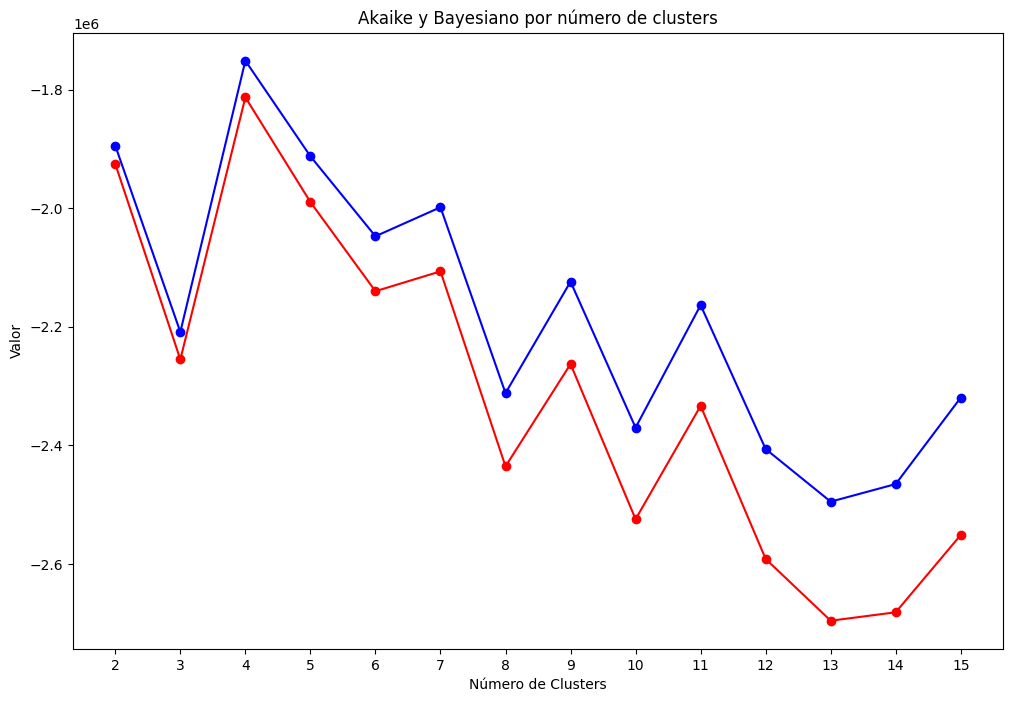

In [1415]:
n_clusters = range(2, 16)
fig, ax = plt.subplots(figsize=(12, 8), nrows=1)
ax.plot(n_clusters, aic, '-o', color='red')
ax.plot(n_clusters, bic, '-o', color='blue')
ax.set(xlabel='Número de Clusters', ylabel='Valor')
ax.set_xticks(n_clusters)
ax.set_title('Akaike y Bayesiano por número de clusters')


- Vemos que tanto el Akaike como el Bayesiano se minimizan en 13 clusters. Tomaremos esta medida.


In [1416]:
final_gmm_results = GaussianMixture(
    n_components=13, random_state=0).fit_predict(clean_df)


In [1417]:
final_gmm_results


array([ 2,  7,  1, ...,  5,  2, 11])

- Ahora vamos a graficar los clusters realizando una reducción de dimensionalidad.


In [1418]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(clean_df)
df_pca = pd.DataFrame(pca, columns=['x', 'y'])


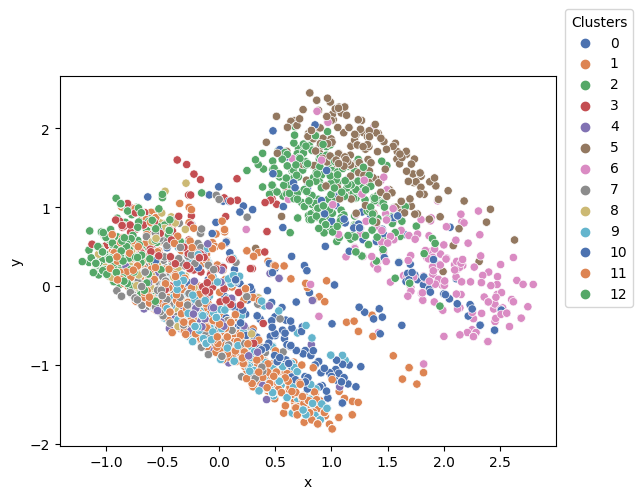

In [1419]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df_pca, x='x', y='y',
                    hue=final_gmm_results, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()


In [1433]:
df_pca.to_csv('./out/gmm.csv')

## 2. K-Modes

Implementado por: Juan Alegría

El algoritmo de k-modes es una variante del algoritmo de k-means que se utiliza para agrupar datos categóricos en lugar de datos numéricos. En lugar de calcular la media de los valores de cada grupo, el algoritmo de k-modes calcula el modo de cada grupo, es decir, el valor más común en cada variable categórica.

Algunas de las decisiones más importantes asociadas a la implementación del algoritmo y los hiperparámetros configurados son:

- Inicialización: como en k-means, la inicialización de los modos puede afectar significativamente el resultado del algoritmo. Una opción común es inicializar los modos de forma aleatoria varias veces y elegir la mejor solución.
- Distancia: para medir la distancia entre un punto de datos y un modo, es común utilizar la distancia Hamming, que mide la cantidad de atributos diferentes entre los dos puntos. Otras medidas de distancia también se pueden utilizar, como la distancia de Jaccard o la distancia euclidiana modificada.
- Número de clusters (k): elegir el número adecuado de clusters es importante para obtener una buena solución. Una forma común de hacerlo es probar diferentes valores de k y elegir el que maximice una medida de calidad, como la silueta o la suma de las distancias cuadradas dentro del cluster.
- Criterio de parada: como en k-means, es importante elegir un criterio de parada adecuado para evitar iterar indefinidamente. Los criterios comunes incluyen un número máximo de iteraciones, convergencia de los modos o una disminución mínima en la función objetivo.


In [1420]:
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import plotnine

# Utilizamos los datos procesados para este algoritmo
df_kmodes = imputed_from_csv

# Muestra aleatoria
df_kmodes.sample(5)


,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Road_Surface_Condition
2669,Tarde,1,Fin de semana,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,Otros,1,Leve,Seca
627,Tarde,1,Fin de semana,1SoloSentido,30.0,Oscuridad_Luces_Encendidas,"Bien, con vientos suaves",2,Urbano,Si,No_hay_cruce,1,Leve,Húmeda
907,Mañana,1,Día laboral,Calzada,40.0,Diurna,"Bien, con vientos suaves",1,Rural,No,No_hay_cruce,1,Leve,Seca
5246,Mañana,1,Día laboral,Calzada,30.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,No_hay_cruce,1,Serio,Seca
730,Noche,2,Día laboral,Calzada,15.0,Diurna,"Bien, con vientos suaves",1,Urbano,Si,No_hay_cruce,1,Leve,Seca


In [1421]:
df_kmodes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time                                         5338 non-null   object 
 1   Number_of_Casualties                         5338 non-null   int64  
 2   Day_of_Week                                  5338 non-null   object 
 3   Road_Type                                    5338 non-null   object 
 4   Speed_limit                                  5338 non-null   float64
 5   Light_Conditions                             5338 non-null   object 
 6   Weather_Conditions                           5338 non-null   object 
 7   Road_Surface_Conditions                      5338 non-null   int64  
 8   Urban_or_Rural_Area                          5338 non-null   object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  5338 non-null   object 
 10  

In [1422]:
# Cambiar valores nulos
df_kmodes = df_kmodes.replace(r'^\s*$', np.nan, regex=True)


In [1423]:
# Seleccionamos el valor único de cada columna categórica
df_kmodes.select_dtypes('object').nunique()


Time                                           4
Day_of_Week                                    2
Road_Type                                      6
Light_Conditions                               5
Weather_Conditions                             9
Urban_or_Rural_Area                            2
Did_Police_Officer_Attend_Scene_of_Accident    3
Junction_Detail                                9
Accident_Severity                              3
Road_Surface_Condition                         5
dtype: int64

In [1424]:
# Seleccionamos las columnas categóricas
cols = df_kmodes.select_dtypes('object').columns
df_cat = df_kmodes[cols]
# Mostramos los datos
df_cat.head()


,Time,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Accident_Severity,Road_Surface_Condition
0,Mañana,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,T,Leve,Seca
1,Mañana,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,No_hay_cruce,Leve,Seca
2,Tarde,Fin de semana,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,T,Leve,Seca
3,Tarde,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,Encrucijada,Serio,Seca
4,Mañana,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,Encrucijada,Leve,Seca


In [1425]:
# Verificamos los valores faltantes
df_cat.isna().sum()


Time                                           0
Day_of_Week                                    0
Road_Type                                      0
Light_Conditions                               0
Weather_Conditions                             0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Detail                                0
Accident_Severity                              0
Road_Surface_Condition                         0
dtype: int64

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


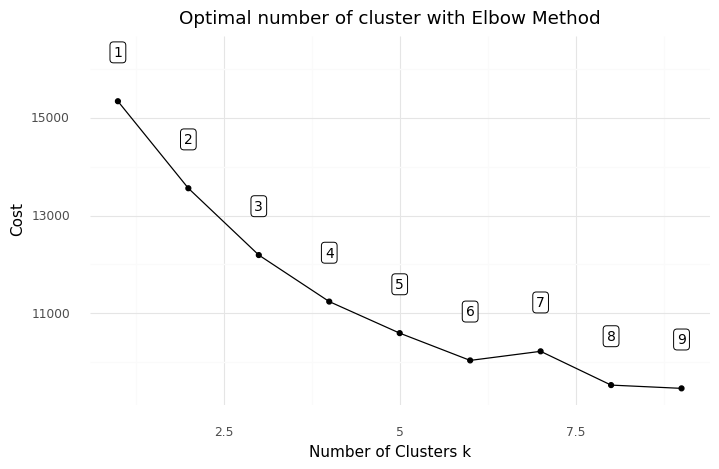

<ggplot: (690341603)>

In [1426]:
# Convertir dataframe a matriz
dfMatrix = df_cat.loc[:].to_numpy()

# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs=-1, n_clusters=cluster,
                        init='Huang', random_state=0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data=df_cost) +
    geom_line(aes(x='Cluster', y='Cost')) +
    geom_point(aes(x='Cluster', y='Cost')) +
    geom_label(aes(x='Cluster', y='Cost', label='Cluster'), size=10, nudge_y=1000) +
    labs(title='Optimal number of cluster with Elbow Method') +
    xlab('Number of Clusters k') +
    ylab('Cost') +
    theme_minimal()
)


In [1427]:
# Creamos una instancia del algoritmo KModes
kmodes = KModes(n_jobs = -1, n_clusters = 6, init = 'Huang', random_state = 0)


# Entrenamos el modelo con los datos
clusters = kmodes.fit_predict(dfMatrix)

clusters


array([1, 3, 1, ..., 1, 0, 3], dtype=uint16)

In [1428]:
# Centroides del cluster
print(kmodes.cluster_centroids_)
# Verificar las iteraciones del cluster creado
print("Iteraciones: ", kmodes.n_iter_)
# Verificar el costo del cluster creado
print("Costo: ", kmodes.cost_)


[['Noche' 'Día laboral' 'Calzada' 'Oscuridad_Luces_Encendidas'
  'Bien, con vientos suaves' 'Urbano' 'Si' 'No_hay_cruce' 'Leve' 'Seca']
 ['Tarde' 'Día laboral' 'Calzada' 'Diurna' 'Bien, con vientos suaves'
  'Urbano' 'Si' 'T' 'Leve' 'Seca']
 ['Tarde' 'Fin de semana' 'Calzada' 'Diurna' 'Bien, con vientos suaves'
  'Urbano' 'No' 'No_hay_cruce' 'Leve' 'Seca']
 ['Mañana' 'Día laboral' 'Calzada' 'Diurna' 'Bien, con vientos suaves'
  'Urbano' 'No' 'No_hay_cruce' 'Leve' 'Seca']
 ['Tarde' 'Día laboral' 'Calzada' 'Diurna' 'Bien, con vientos suaves'
  'Rural' 'Si' 'No_hay_cruce' 'Serio' 'Seca']
 ['Tarde' 'Fin de semana' 'Calzada' 'Diurna' 'Bien, con vientos suaves'
  'Urbano' 'Si' 'No_hay_cruce' 'Leve' 'Seca']]
Iteraciones:  2
Costo:  10035.0


In [1429]:
# Add the cluster to the dataframe
df_cat['Cluster Labels'] = kmodes.labels_
df_cat['Segment'] = df_cat['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df_cat['Segment'] = df_cat['Segment'].astype('category')
df_cat['Segment'] = df_cat['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])


/var/folders/x7/86msfzy10gn62hrc2kbqnsyw0000gq/T/ipykernel_43994/3583339209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/x7/86msfzy10gn62hrc2kbqnsyw0000gq/T/ipykernel_43994/3583339209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/x7/86msfzy10gn62hrc2kbqnsyw0000gq/T/ipykernel_43994/3583339209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [1435]:
# Columns for centroids
list_col = ['Time', 'Number_of_Casualties', 'Day_of_Week']
cols = [col for col in df_cat if col not in list_col]
# Create an index for cluster interpretation
index = ['First Cluster', 'Second Cluster', 'Third Cluster', 'Fourth Cluster', 'Fifth Cluster', 'Sixth Cluster']
# Create the data frame
df_kmodes = pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

df_kmodes

,Road_Type,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Accident_Severity,Road_Surface_Condition,Cluster Labels,Segment
First Cluster,Noche,Día laboral,Calzada,Oscuridad_Luces_Encendidas,"Bien, con vientos suaves",Urbano,Si,No_hay_cruce,Leve,Seca
Second Cluster,Tarde,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,T,Leve,Seca
Third Cluster,Tarde,Fin de semana,Calzada,Diurna,"Bien, con vientos suaves",Urbano,No,No_hay_cruce,Leve,Seca
Fourth Cluster,Mañana,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Urbano,No,No_hay_cruce,Leve,Seca
Fifth Cluster,Tarde,Día laboral,Calzada,Diurna,"Bien, con vientos suaves",Rural,Si,No_hay_cruce,Serio,Seca
Sixth Cluster,Tarde,Fin de semana,Calzada,Diurna,"Bien, con vientos suaves",Urbano,Si,No_hay_cruce,Leve,Seca


In [1436]:
df_kmodes.to_csv('./out/kmodes.csv')